# ML-based Career Feature
This notebook contains basic analysis and usage of the test model.

### 1. Load model and test dataset

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#matplotlib inline

# Read the data
test_df = pd.read_csv('ML/student_data.csv')

In [296]:
test_df.head()

,Student ID,Gender,Age,Major,GPA,Extra Curricular,Num Programming Languages,Num Past Internships,Good Candidate
0,0,F,21,Statistics and Machine Learning,2.83,Sorority,4,1,0
1,1,M,20,Information Systems,2.89,Fraternity,5,3,0
2,2,F,20,Math,2.66,Teaching Assistant,3,1,0
3,3,M,20,Information Systems,2.48,Fraternity,5,0,0
4,4,F,21,Statistics and Machine Learning,3.30,Sorority,2,1,0


In [297]:
test_df.describe()

,Student ID,Age,GPA,Num Programming Languages,Num Past Internships,Good Candidate
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,249.500000,20.944000,2.905780,3.04600,2.052000,0.474000
std,144.481833,1.455025,0.839559,1.36073,1.407572,0.499824
min,0.000000,18.000000,0.000000,1.00000,0.000000,0.000000
25%,124.750000,20.000000,2.345000,2.00000,1.000000,0.000000
50%,249.500000,21.000000,2.990000,3.00000,2.000000,0.000000
75%,374.250000,22.000000,3.560000,4.00000,3.000000,1.000000
max,499.000000,25.000000,4.000000,5.00000,4.000000,1.000000


### 2. Plotting the distribution of the test dataset
#### Gender:

Text(0.5, 0, 'Gender')

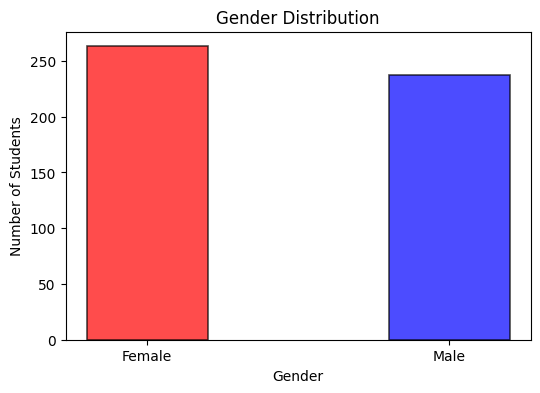

In [298]:
names = ['Female', 'Male']

plt.figure(figsize=(6, 4))
plt.bar(names, test_df.groupby('Gender').size(), width=0.4, color=['red', 'blue'], alpha=0.7, edgecolor='black', linewidth=1.2)
plt.title('Gender Distribution')
plt.ylabel('Number of Students')
plt.xlabel('Gender')

#### Age:

<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel='Number of Students'>

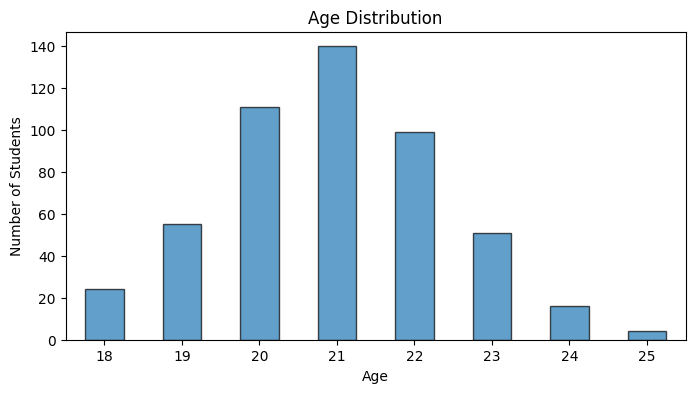

In [299]:
test_df.groupby('Age').size().plot(kind='bar', title='Age Distribution', figsize=(8, 4), ylabel='Number of Students', rot=0, edgecolor='black', linewidth=1, alpha=0.7)

#### Major:

Text(0.5, 1.0, 'Major Distribution')

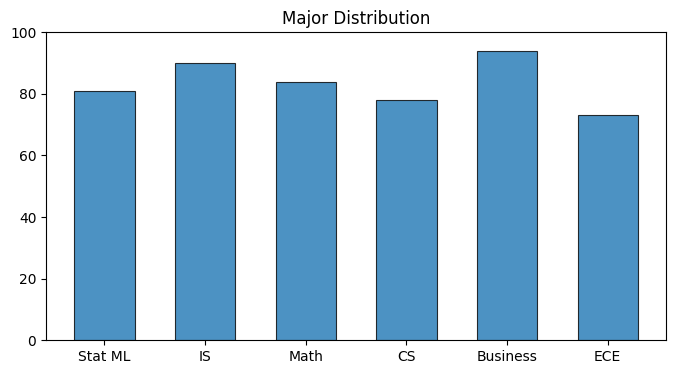

In [300]:
names = ['Stat ML', 'IS', 'Math', 'CS', 'Business', 'ECE']
plt.figure(figsize=(8, 4))
plt.bar(names, test_df.groupby('Major').size(), width= 0.6, edgecolor='black', linewidth=.8, alpha=0.8)
plt.yticks(np.arange(0, 110, 20))
plt.title('Major Distribution')

#### GPA:

Text(0, 0.5, 'Number of Students')

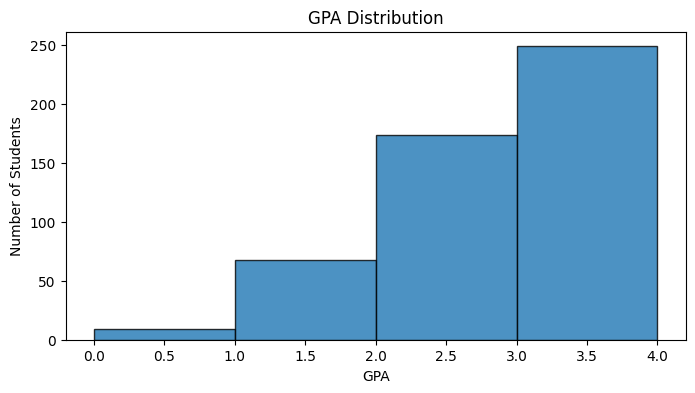

In [301]:
plt.figure(figsize=(8, 4))
plt.hist(test_df['GPA'], bins=4, edgecolor='black', linewidth=1, alpha=0.8)
plt.title('GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Number of Students')

#### Extra Curriculars:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Sorority'),
  Text(1, 0, 'Fraternity'),
  Text(2, 0, 'Teaching Assistant'),
  Text(3, 0, 'Volleyball'),
  Text(4, 0, 'Society of Women Engineers'),
  Text(5, 0, 'American Football'),
  Text(6, 0, 'Student Government'),
  Text(7, 0, "Men's Basketball"),
  Text(8, 0, "Men's Golf"),
  Text(9, 0, 'Student Theatre'),
  Text(10, 0, 'Women in CS'),
  Text(11, 0, 'Buggy')])

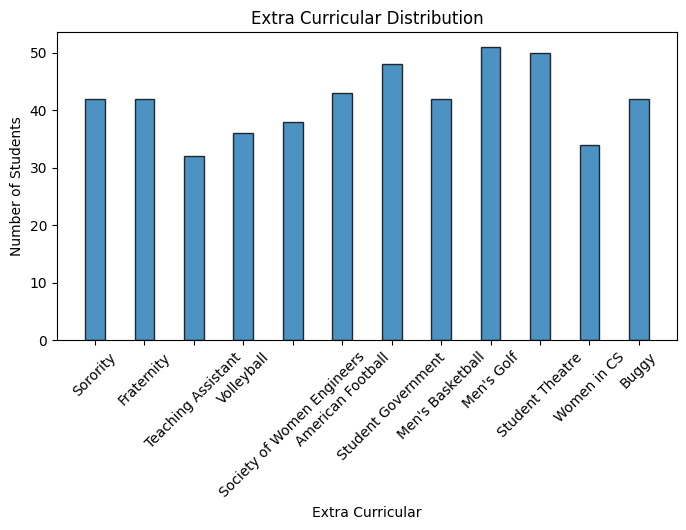

In [302]:
names = test_df['Extra Curricular'].unique()
plt.figure(figsize=(8, 4))
plt.bar(names, test_df.groupby('Extra Curricular').size(), width=0.4, edgecolor='black', linewidth=1, alpha=0.8)
plt.title('Extra Curricular Distribution')
plt.ylabel('Number of Students')
plt.xlabel('Extra Curricular')
plt.xticks(rotation=45)

#### Number of Programming Languages:

([<matplotlib.axis.XTick at 0x7f441437a7c0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

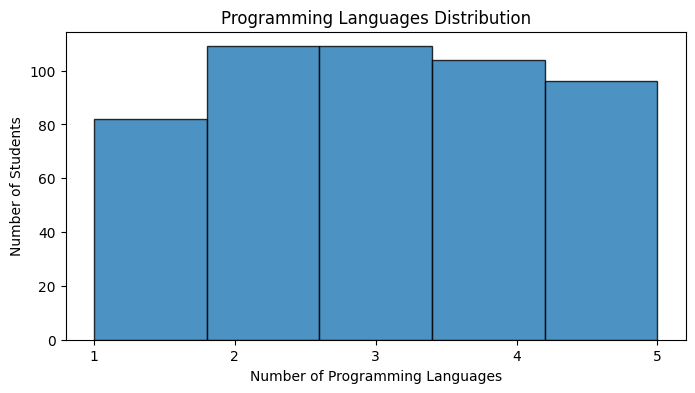

In [303]:
plt.figure(figsize=(8, 4))
plt.hist(test_df['Num Programming Languages'], bins=5, edgecolor='black', linewidth=1, alpha=0.8)
plt.title('Programming Languages Distribution')
plt.xlabel('Number of Programming Languages')
plt.ylabel('Number of Students')
plt.xticks(np.arange(1, 6, 1))

#### Number of Past Internships:

([<matplotlib.axis.XTick at 0x7f44142dcdc0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

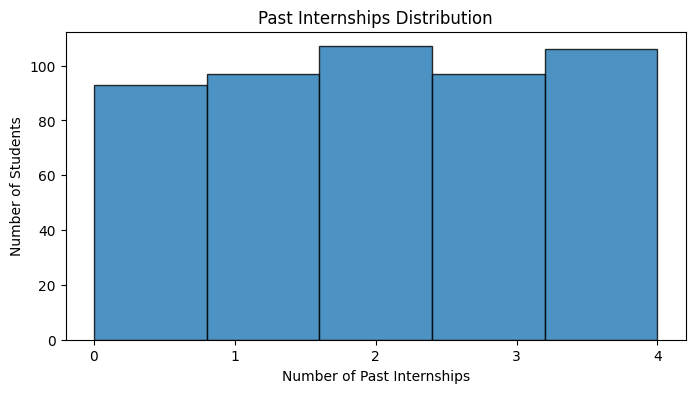

In [304]:
plt.figure(figsize=(8, 4))
plt.hist(test_df['Num Past Internships'], bins=5, edgecolor='black', linewidth=1, alpha=0.8)
plt.title('Past Internships Distribution')
plt.xlabel('Number of Past Internships')
plt.ylabel('Number of Students')
plt.xticks(np.arange(0, 5, 1))

#### Good Candidates:

Text(0.5, 0, 'Good Candidate?')

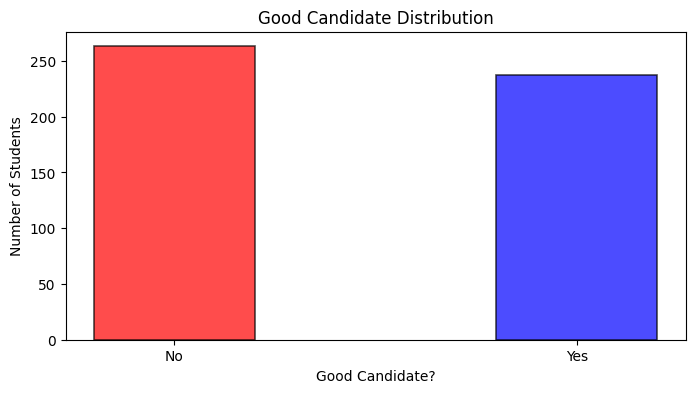

In [305]:
names = ['No', 'Yes']

plt.figure(figsize=(8, 4))
plt.bar(names, test_df.groupby('Good Candidate').size(), width=0.4, color=['red', 'blue'], alpha=0.7, edgecolor='black', linewidth=1.2)
plt.title('Good Candidate Distribution')
plt.ylabel('Number of Students')
plt.xlabel('Good Candidate?')

### 3. Predicting the output of the test dataset using the model

Splitting the data into inputs and the label:

In [306]:
test_df = test_df.drop(['Student ID', 'Gender'], axis=1)
X = test_df.drop(['Good Candidate'], axis=1)
y = test_df['Good Candidate']
X.head()

,Age,Major,GPA,Extra Curricular,Num Programming Languages,Num Past Internships
0,21,Statistics and Machine Learning,2.83,Sorority,4,1
1,20,Information Systems,2.89,Fraternity,5,3
2,20,Math,2.66,Teaching Assistant,3,1
3,20,Information Systems,2.48,Fraternity,5,0
4,21,Statistics and Machine Learning,3.30,Sorority,2,1


Training model:

In [307]:
X = pd.get_dummies(X)

In [308]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#splitting the train and test sets
X_train, X_test, y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [309]:
clftree = RandomForestClassifier(n_estimators=1000, max_depth=10, max_features=None)
pipeline = Pipeline(steps=[('classifier', clftree)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

#### Exporting model:

In [310]:
import pickle
pickle.dump(pipeline, open('ML/model.pkl','wb'))

#### Exporting test data:

In [311]:
X_test.to_csv('ML/test.csv', index=False)

### 4. Report the accuracy of the model, and the confusion matrix

#### Accuracy:

In [312]:
# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
print('Accuracy Score', accuracy_score(y_test, y_pred))

Accuracy Score 0.93


#### Confusion Matrix:

In [313]:
# Show the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix[0])
print(confusion_matrix[1])

[46  5]
[ 2 47]
